The uniform cut is bound to include repetitions. It must be chosen as small as possible to be sure not to include two movements within one window of time. Maybe a different window should be chosen for rapid movements vs. longer ones. To start with, we prefer to chose a window adapted to the fastest movements, i.e. the length of a step, following the example of this <a href='https://www.researchgate.net/publication/231212217_Step_Length_Estimation_Using_Handheld_Inertial_Sensors?enrichId=rgreq-423614f69f285922f33cc150bb687ef6-XXX&enrichSource=Y292ZXJQYWdlOzIzMTIxMjIxNztBUzo5OTU4MDk5MzYwNTY0NEAxNDAwNzUzMzY4MjM4&el=1_x_3&_esc=publicationCoverPdf'>step length estimation.</a>
<p>"These features are computed by dividing the data in windows of 256 samples, corresponding to 2.56 seconds, with a 50% overlap. The window size is selected to be small enough to catch any fast motion’s change and large enough to include one complete gait cycle. In addition, a window size N=2^n allows the computation of the Fast Fourier Transform (FFT) used for the analysis in the frequency domain. It is worth mentioning that the proposed FFT analysis is applied on a window that is small enough to target real time applications since the induced lag is around half of the window size, namely 1.28 seconds."</p>

In [2]:
import pandas as pd
trackers=pd.read_csv('data1.csv')
#trackers=pd.read_csv('data2.csv')

In [13]:
sensors_columns=list(trackers.columns)
sensors_columns.remove('exercise')
list_names=[s for s in trackers['exercise'].unique()]

In [25]:
#Basic visualization
def pre_visualize(data,title):
    import matplotlib.pyplot as plt
    %matplotlib inline
    data.plot(figsize=(12, 6))
    plt.xlabel('time (unit: 10 milliseconds)'), plt.ylabel('acceleration'),plt.title(title)
    plt.show()

In [14]:
#Function to add descriptive statistics
def descr_stats(df,mvt_df):
    statistics=['mean','std','min','max']
    describe_df=mvt_df.describe()
    for k in sensors_columns:
        for l in statistics:
            stat_name=str(k)+'_'+str(l)
            df[stat_name]=describe_df[k].loc[l]
    return df[stat_name]

#### Cut by fixed-size windows (2.56s) and generate a dataframe of statistics

jab_cross_shadowboxing_medium_20_T7R_1531551242371.txt


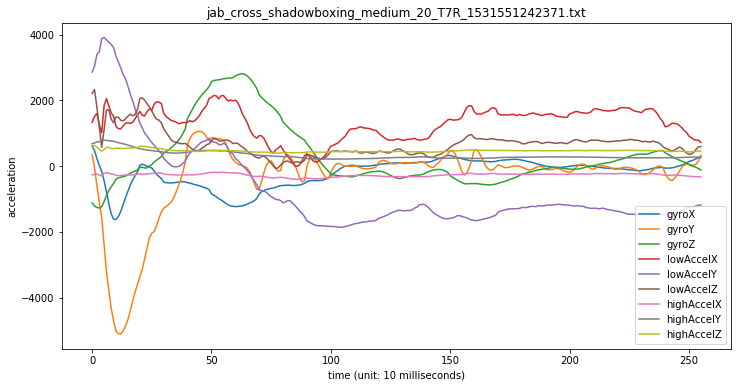

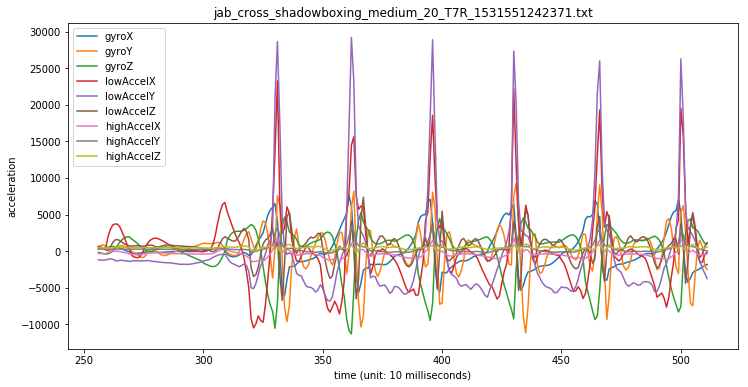

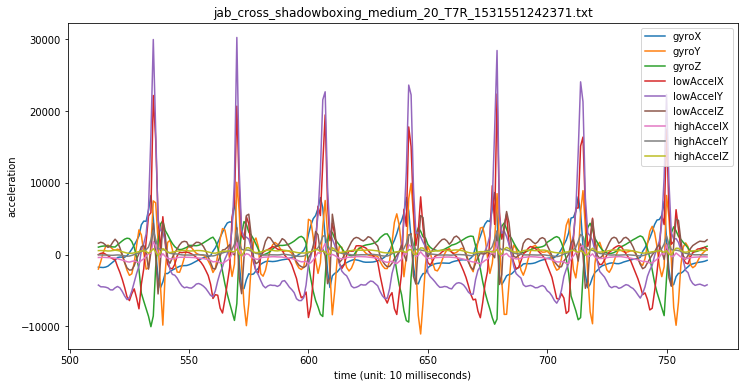

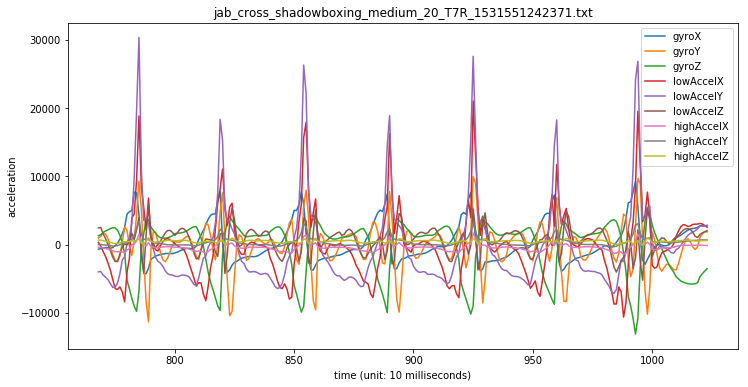

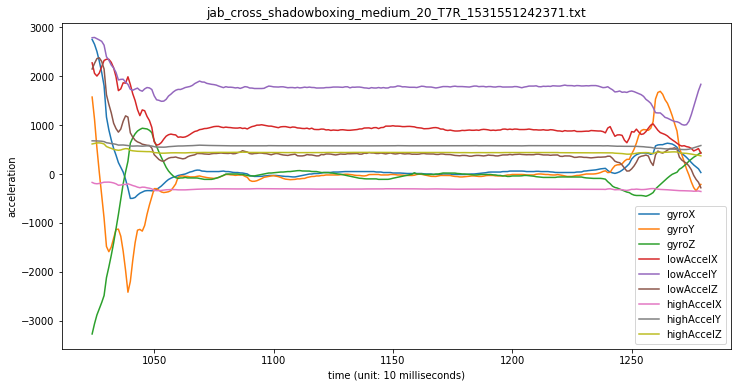

jab_cross_shadowboxing_slow_20_T7R_1531551153638.txt


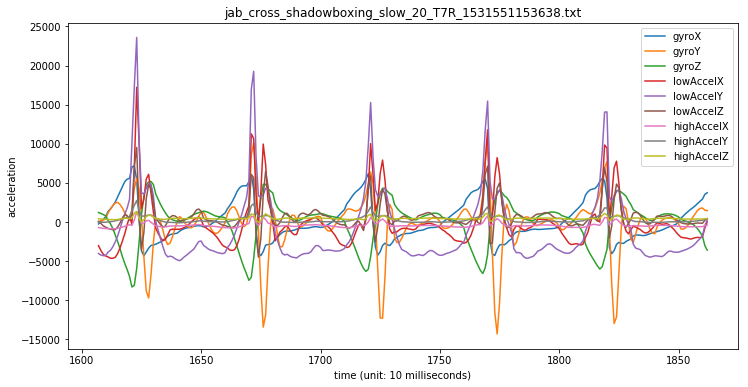

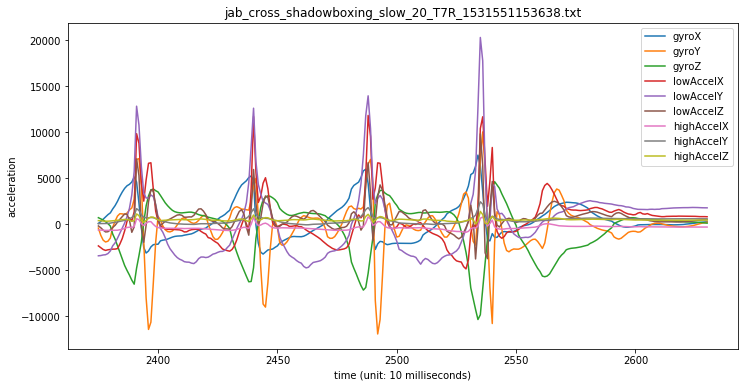

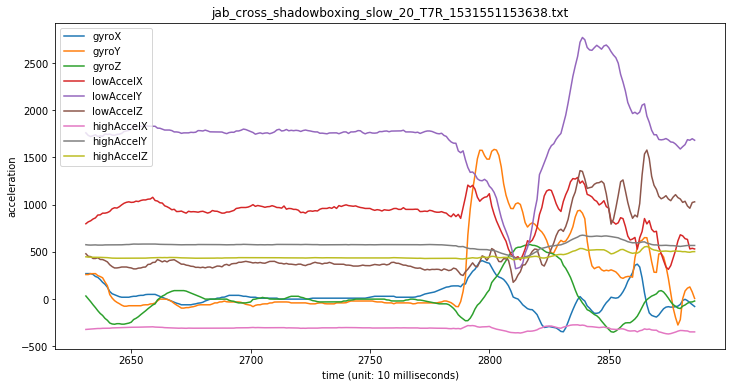

jab_cross_waterbag_hard_20_T7R_1531551996366.txt


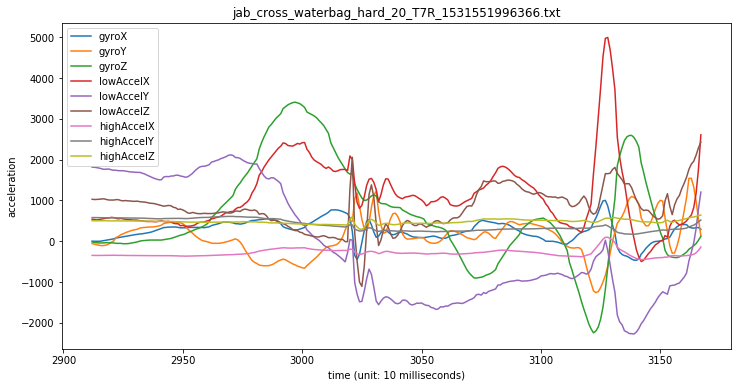

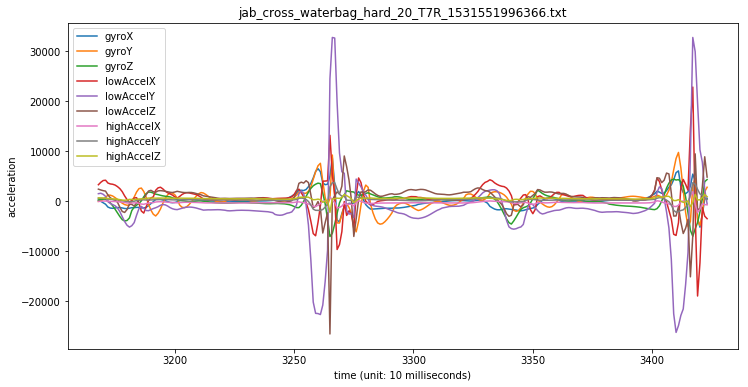

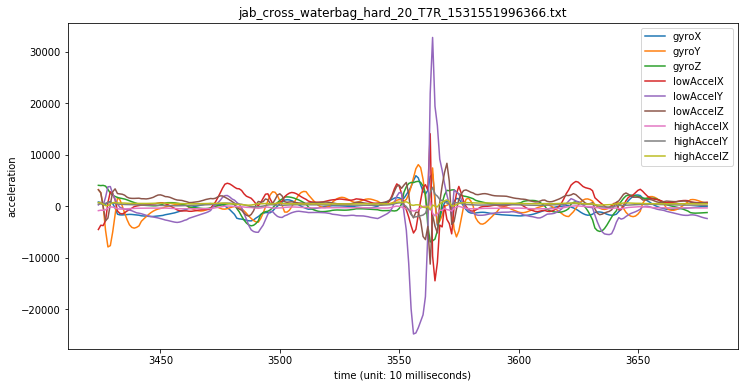

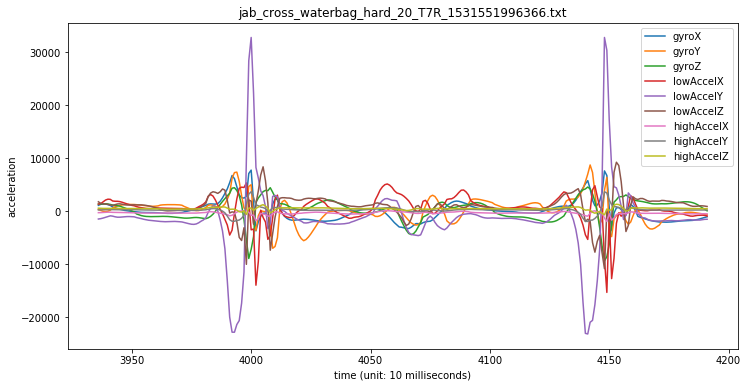

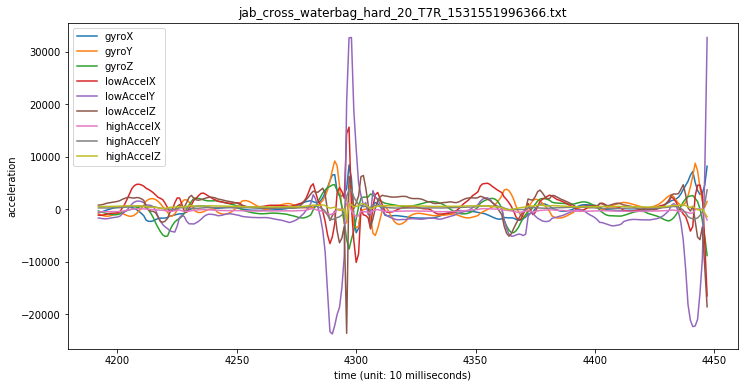

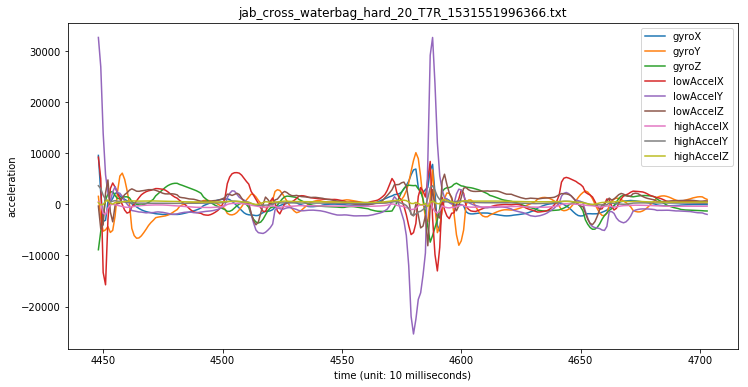

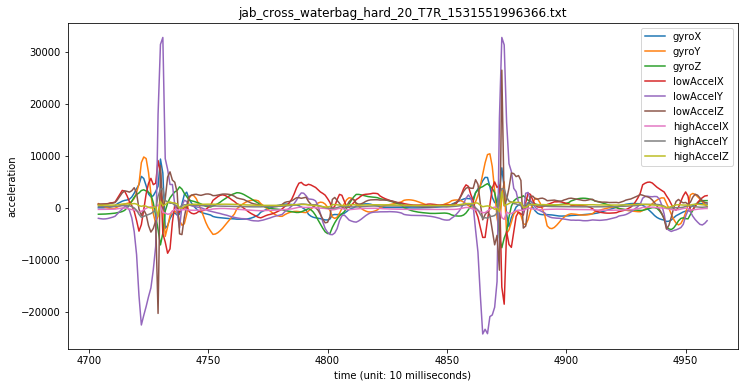

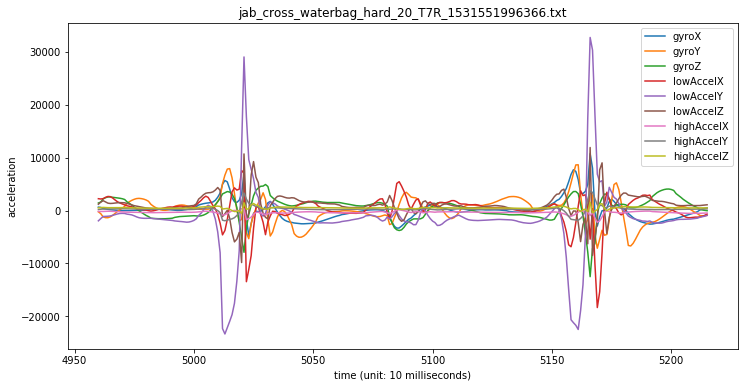

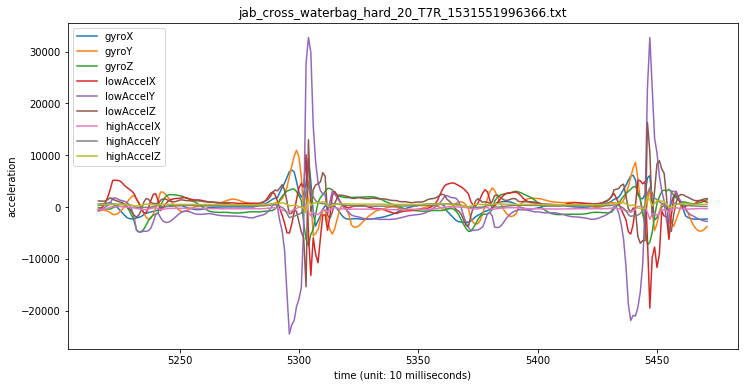

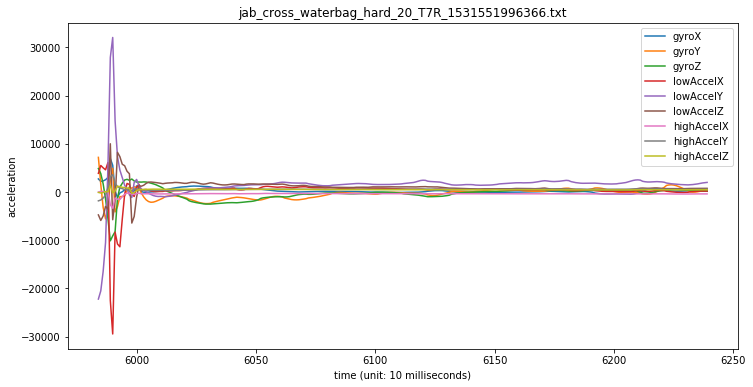

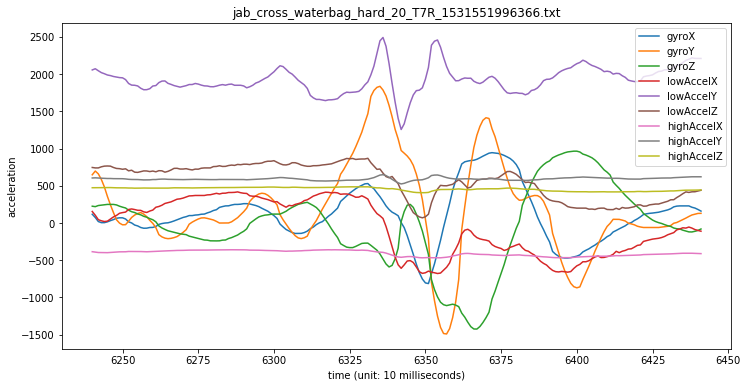

jab_cross_waterbag_light_20_T7R_1531551877937.txt


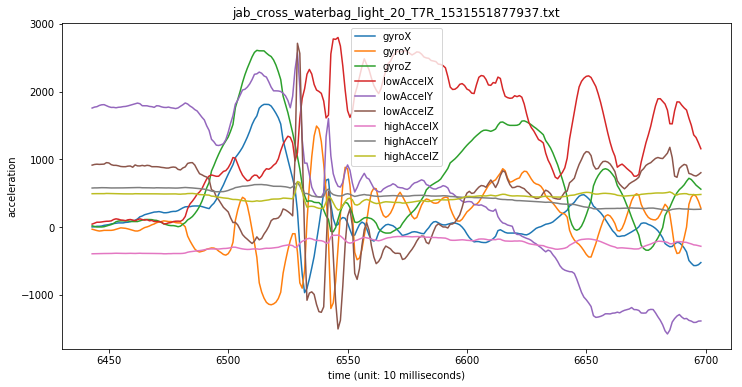

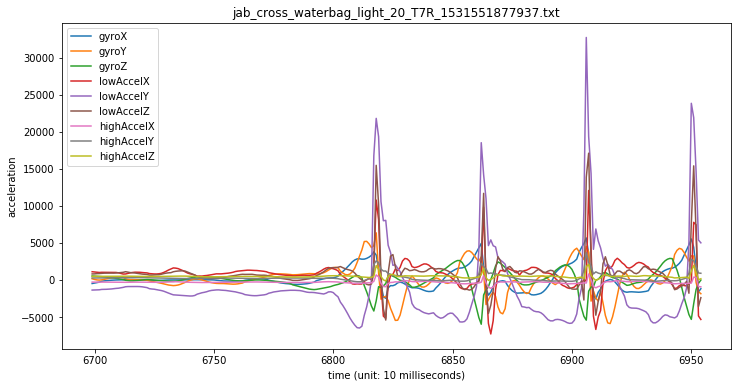

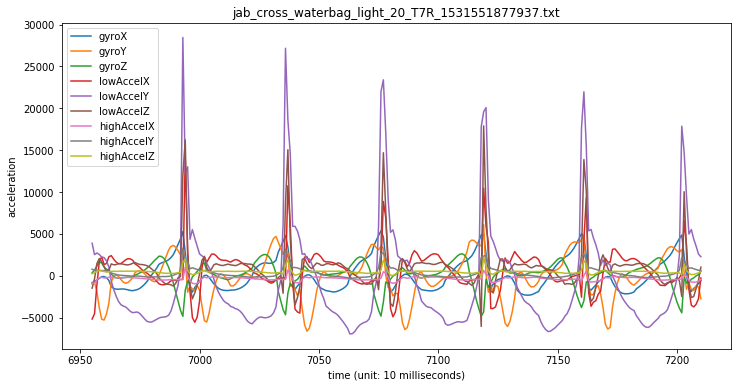

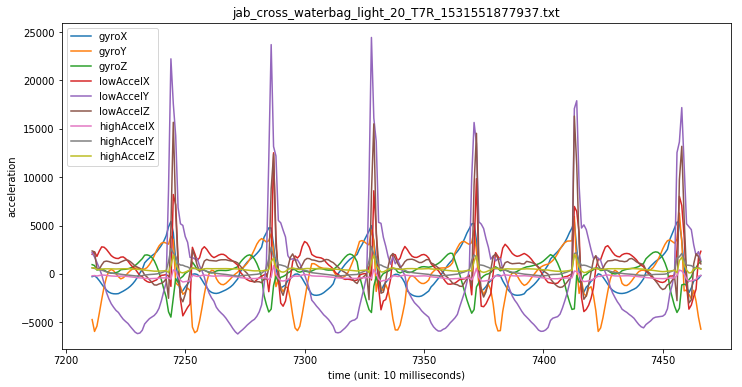

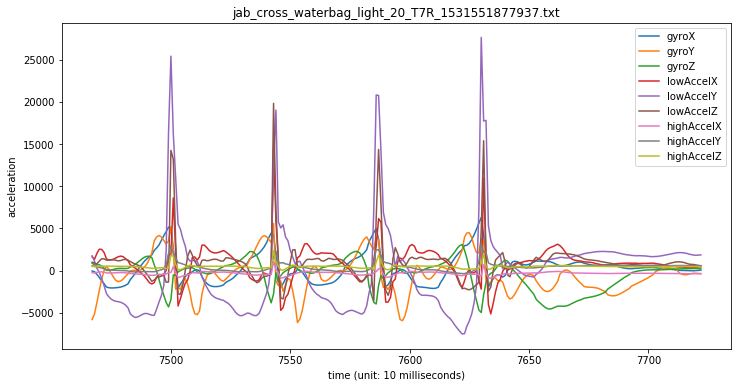

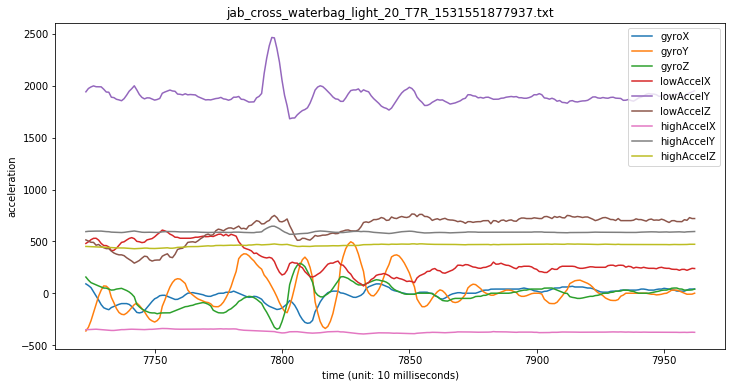

jab_cross_waterbag_mediumpower_20_T7R_1531551924743.txt


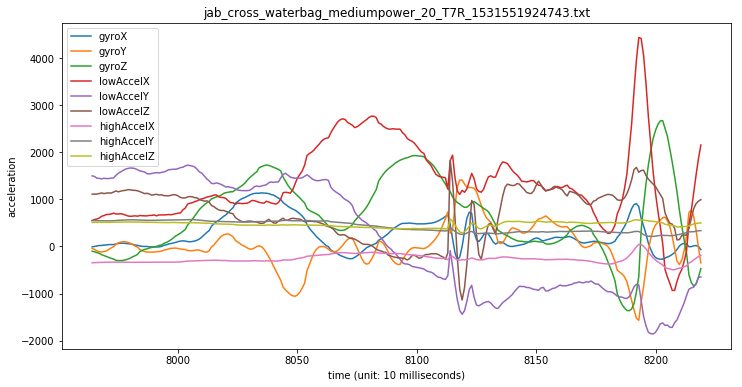

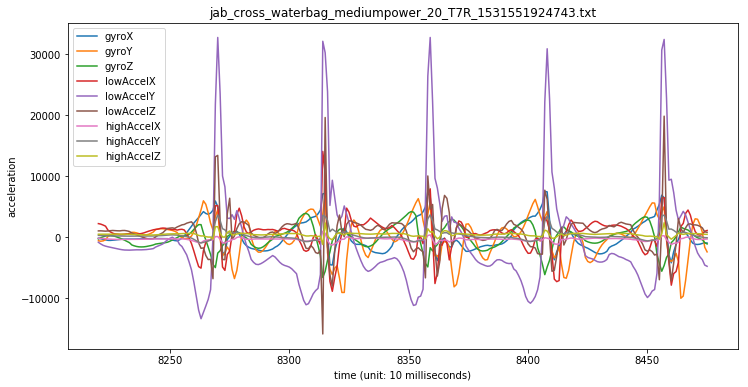

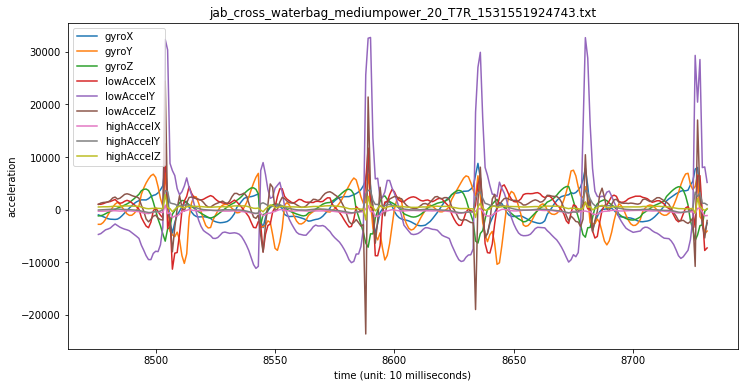

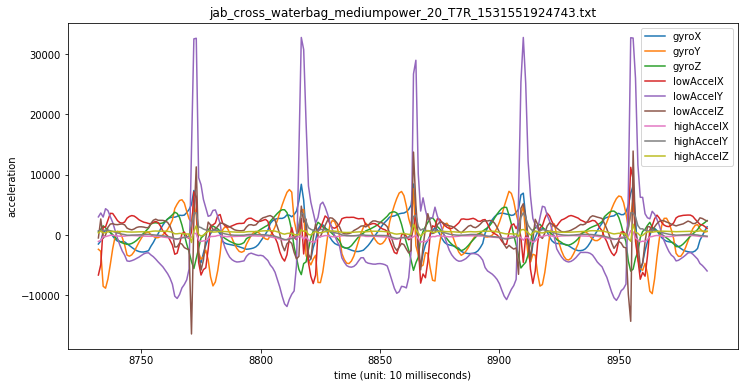

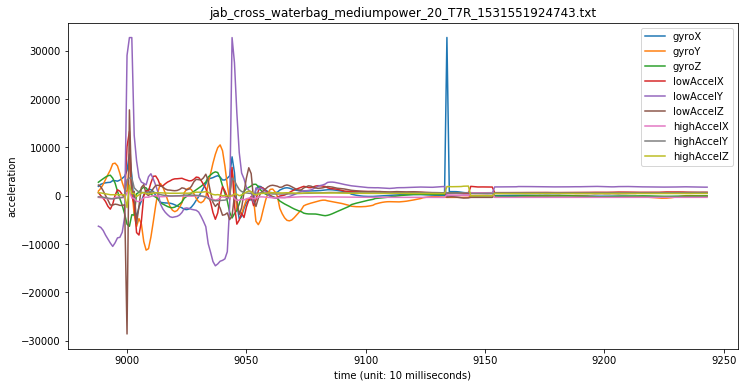

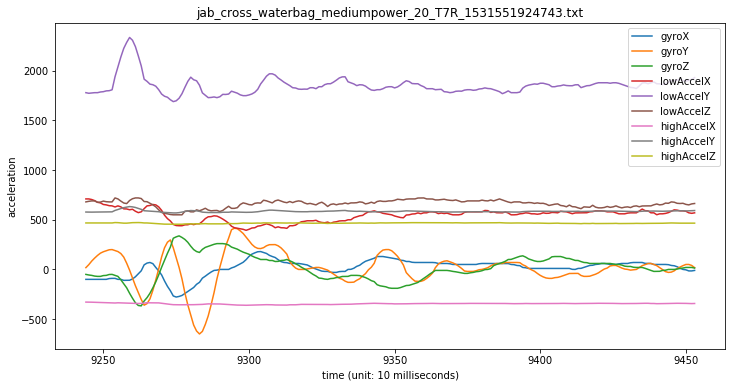

biceps_curls_10_T7L_1531913275450.txt
biceps_curls_10_T7L_1531913463782.txt
biceps_curls_10_T7L_1531913706454.txt
biceps_curls_10_T7R_1531913275450.txt
biceps_curls_10_T7R_1531913463782.txt
biceps_curls_10_T7R_1531913706454.txt
deadlifts_heavy_8_T7L_1531912543772.txt
deadlifts_heavy_8_T7L_1531912657776.txt
deadlifts_heavy_8_T7L_1531912925288.txt
deadlifts_heavy_8_T7R_1531912543772.txt
deadlifts_heavy_8_T7R_1531912657776.txt
deadlifts_heavy_8_T7R_1531912925288.txt
deadlifts_heavy_9_T7L_1531912395989.txt
deadlifts_heavy_9_T7R_1531912395989.txt
freestyle_punches_waterbag_T11L_1531742535492.txt
freestyle_punches_waterbag_T11R_1531742535492.txt
hooks_waterbag_hard_20_T7L_1531552258694.txt
hooks_waterbag_hard_20_T7R_1531552258694.txt
hooks_waterbag_hard_40_T7L_1531552258694.txt
hooks_waterbag_hard_40_T7R_1531552258694.txt
hooks_waterbag_light_20_T7L_1531552145230.txt
hooks_waterbag_light_20_T7R_1531552145230.txt
hooks_waterbag_light_40_T7L_1531552145230.txt
hooks_waterbag_light_40_T7R_153155

In [ ]:
flat_statistics=pd.DataFrame()
#test for different window sizes
#Take each exercise one by one
for i in range(0,len(list_names)):
    exercise_indices = trackers[trackers.exercise.str.contains(list_names[i])].index
    exercise=trackers.loc[exercise_indices, :]
    print(list_names[i])
    #Separate by individual movements 
    for j in range(0,exercise.shape[0],256):     
        #cut into distinct movements
        one_mvt=exercise[j:j+256]
        #one_mvt=one_mvt.drop('exercise',axis=1)
        if i<5:
            pre_visualize(one_mvt,list_names[i])
        
        #Flatten
        b=pd.Series()
        #b['exercise']=list_names[i]
        b['length_exercise']=exercise.describe().loc['count'][0]
        b['start_mvt']=j
        b['end_mvt']=j+256
        descr_stats(b,one_mvt)
        flat_statistics=flat_statistics.append(b,ignore_index=True)
        

In [23]:
window.tail()

gyroX  gyroY  gyroZ  lowAccelX  lowAccelY  lowAccelZ  highAccelX  \
361381   20.0  -60.0    0.0      -62.0       28.0     2002.0      -406.0   
361382   20.0  -60.0    0.0      -68.0       22.0     2018.0      -406.0   
361383   20.0  -60.0    0.0      -70.0       29.0     2011.0      -407.0   
361384   20.0  -60.0    0.0      -70.0       30.0     2010.0      -407.0   
361385    NaN    NaN    NaN        NaN        NaN        NaN         NaN   

        highAccelY  highAccelZ  
361381       402.0       600.0  
361382       402.0       601.0  
361383       402.0       601.0  
361384       403.0       601.0  
361385         NaN         NaN

In [21]:
flat_statistics.tail()

end_mvt                                           exercise  gyroX_max  \
34    512.0  jab_cross_waterbag_mediumpower_20_T7R_15315519...     7543.0   
35    768.0  jab_cross_waterbag_mediumpower_20_T7R_15315519...     8804.0   
36   1024.0  jab_cross_waterbag_mediumpower_20_T7R_15315519...     8450.0   
37   1280.0  jab_cross_waterbag_mediumpower_20_T7R_15315519...    32756.0   
38   1536.0  jab_cross_waterbag_mediumpower_20_T7R_15315519...      180.0   

    gyroX_mean  gyroX_min    gyroX_std  gyroY_max  gyroY_mean  gyroY_min  \
34  277.941406    -4539.0  2408.543664     6986.0  -15.691406    -9984.0   
35  281.757812    -5117.0  2628.688790     7493.0 -176.277344   -10397.0   
36  163.089844    -6118.0  2738.306652     7667.0 -429.246094    -9722.0   
37  521.097656    -4794.0  2572.404584    10520.0 -483.089844   -11258.0   
38   17.857143     -278.0    84.134084      415.0   11.561905     -650.0   

      gyroY_std    ...      lowAccelX_std  lowAccelY_max  lowAccelY_mean  \
34  3118.075670    ...        2713.764627        32730.0     -823.167969   
35  3635.110868    ...        2988.166290        32712.0    -1124.183594   
36  3679.931231    ...        2841.782007        32730.0     -926.570312   
37  2661.787158    ...        1896.803849        32730.0      939.625000   
38   173.245127    ...          64.973470         2336.0     1852.190476   

    lowAccelY_min  lowAccelY_std  lowAccelZ_max  lowAccelZ_mean  \
34       -13338.0    8427.020680        19838.0      763.281250   
35       -11166.0    8535.685655        24420.0      709.058594   
36       -11850.0    8531.846229        13914.0      753.378906   
37       -14498.0    5752.140133        17767.0      546.992188   
38         1690.0      92.790611          720.0      660.195238   

    lowAccelZ_min  lowAccelZ_std  start_mvt  
34       -15836.0    3304.294996      256.0  
35       -23630.0    3768.074159      512.0  
36       -16395.0    2830.820886      768.0  
37       -28608.0    2526.657782     1024.0  
38          550.0      38.372076     1280.0  

[5 rows x 40 columns]

In [ ]:
flat_statistics.to_csv('/files/flat_statistics_fixed_window_256_no_overlap.csv',index=False)
